In [2]:
    pip install plotly 


  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=8903a98a102929a66ec18490cc3c4dd9ffe0af02a22fccfa20b42a4b9935ee9e
  Stored in directory: c:\users\saurabh\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


# Importing necessary Libraries

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os



# Data Exploration


In [37]:
bit_data=pd.read_csv(r'C:\Users\Saurabh\Projects\bitcoin.csv')
bit_data["date"]=pd.to_datetime(bit_data["Timestamp"],unit="s").dt.date
group=bit_data.groupby("date")
data=group["Close"].mean()

In [38]:
data.shape


(729,)

In [39]:
data.isnull().sum()


0

In [40]:
data.head()


date
2011-12-31    4.482500
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.223333
Name: Close, dtype: float64

# RNN

In [41]:
close_train=data.iloc[:len(data)-50]
close_test=data.iloc[len(close_train):]

In [42]:
#feature scalling (set values between 0-1)
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

In [43]:
timestep=50
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (629, 50, 1)
y_train shape=  (629,)


In [44]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(x_train,y_train,epochs=100,batch_size=64)

Using TensorFlow backend.



Epoch 1/100
629/629 [==============================] - 4s 7ms/step - loss: 0.1015
Epoch 2/100
629/629 [==============================] - 3s 5ms/step - loss: 0.0171
Epoch 3/100
629/629 [==============================] - 3s 5ms/step - loss: 0.0059
Epoch 4/100
629/629 [==============================] - 3s 5ms/step - loss: 0.0053
Epoch 5/100
629/629 [==============================] - 3s 5ms/step - loss: 0.0047
Epoch 6/100
629/629 [==============================] - 3s 5ms/step - loss: 0.0037
Epoch 7/100
629/629 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 8/100
629/629 [==============================] - 4s 6ms/step - loss: 0.0036
Epoch 9/100
629/629 [==============================] - 4s 7ms/step - loss: 0.0033
Epoch 10/100
629/629 [==============================] - 4s 6ms/step - loss: 0.0031
Epoch 11/100
629/629 [==============================] - 4s 6ms/step - loss: 0.0029
Epoch 12/100
629/629 [==============================] - 4s 6ms/step - loss: 0.0026
Epoch 13/100

629/629 [==============================] - 4s 6ms/step - loss: 6.0715e-04
Epoch 96/100
629/629 [==============================] - 4s 6ms/step - loss: 6.4858e-04
Epoch 97/100
629/629 [==============================] - 4s 6ms/step - loss: 7.4402e-04
Epoch 98/100
629/629 [==============================] - 4s 6ms/step - loss: 6.1322e-04
Epoch 99/100
629/629 [==============================] - 4s 6ms/step - loss: 7.7627e-04
Epoch 100/100
629/629 [==============================] - 4s 6ms/step - loss: 7.5917e-04


In [45]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [47]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [48]:
predicted_data=regressor.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

In [49]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

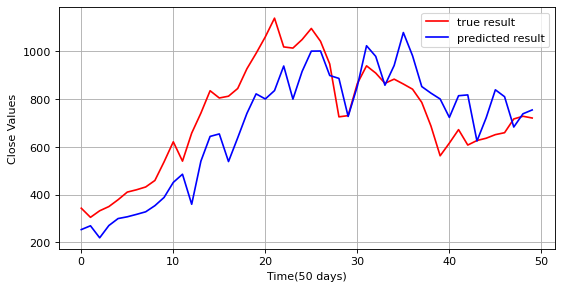

In [50]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()